In [123]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar -xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

import findspark
findspark.init()

In [124]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [125]:
df = spark\
        .read\
        .format('com.databricks.spark.csv')\
        .options(header='true', inferschema='true', delimiter=',')\
        .load(os.path.join('data','서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv'))

In [126]:
df=df.withColumnRenamed('�뿩����','date')
df=df.withColumnRenamed('�뿩�Ǽ�','count')

In [127]:
from pyspark.sql.functions import to_date

_dfCasted=df.withColumn('date', to_date(df['date'], 'yyyy-MM-dd'))

In [128]:
myDf = _dfCasted.withColumn('count', _dfCasted['count'].cast("integer"))

In [129]:
myDf.groupBy('date').agg({"count":"sum"}).withColumnRenamed('date','year').show()

+----------+----------+
|      year|sum(count)|
+----------+----------+
|2018-05-28|     40775|
|2018-08-10|     36178|
|2018-03-17|     20165|
|2018-06-06|     40440|
|2018-06-26|      6391|
|2018-08-08|     37140|
|2018-08-11|     31293|
|2018-09-01|     43847|
|2018-09-09|     54213|
|2018-10-05|      7772|
|2018-11-02|     44917|
|2018-06-30|     26911|
|2018-11-01|     41911|
|2019-02-23|     23742|
|2018-03-23|     17904|
|2018-05-26|     37761|
|2018-09-08|     55470|
|2019-01-07|     16795|
|2019-01-08|     15833|
|2019-01-28|     17317|
+----------+----------+
only showing top 20 rows



In [130]:
from pyspark.sql.functions import year, month

In [131]:
myDf_new = myDf.withColumn('year', year(myDf.date))
myDf_new = myDf_new.withColumn('month', month(myDf.date)) 

# 문제 1-1 - 시작/답

In [132]:
myDf_new.groupBy('year').agg({"count":"sum"}).show()

+----+----------+
|year|sum(count)|
+----+----------+
|2018|  10124874|
|2019|   1871935|
+----+----------+



# 문제 1-2 - 시작

In [133]:
year_monthDf = myDf_new.groupBy('year','month').agg({"count":"sum"}).sort('year', 'month')

# 문제 1-2 - 답

In [134]:
year_monthDf.show()

+----+-----+----------+
|year|month|sum(count)|
+----+-----+----------+
|2018|    1|    164367|
|2018|    2|    168741|
|2018|    3|    462661|
|2018|    4|    687885|
|2018|    5|    965609|
|2018|    6|   1207123|
|2018|    7|   1100015|
|2018|    8|   1037505|
|2018|    9|   1447993|
|2018|   10|   1420621|
|2018|   11|    961532|
|2018|   12|    500822|
|2019|    1|    495573|
|2019|    2|    471543|
|2019|    3|    904819|
+----+-----+----------+



# 문제 1-3 - 시작/답

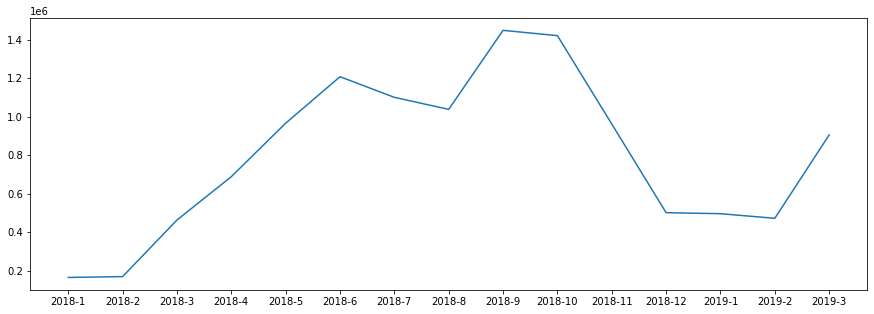

In [137]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,5))
x_values = year_monthDf.rdd.map(lambda fields : str(fields[0])+'-'+str(fields[1])).collect()
y_values = year_monthDf.rdd.map(lambda fields : fields[2]).collect()
plt.plot(x_values, y_values)
plt.show()